<a href="https://colab.research.google.com/github/rroszczyk/Python/blob/master/testowanie/www.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install selenium
!apt-get update                   # aktualizacja platformy dla prawidłowego działania apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install chromedriver-autoinstaller

import sys

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import selenium.webdriver.support.ui as ui
from selenium.webdriver.common.by import By
import time
import requests
import os
import matplotlib.pyplot as plt
import numpy as np
import chromedriver_autoinstaller
from selenium import webdriver

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 42 n

In [2]:
def pobierzPlik(url, nazwaPliku):
    req = requests.get(url, stream=True)
    with open(nazwaPliku, 'wb') as uchwytPliku:
        for chunk in req.iter_content():
            uchwytPliku.write(chunk)

In [10]:
# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()
browser = webdriver.Chrome(options=chrome_options)

In [11]:
browser.get('https://www.diki.pl/slownik-angielskiego?q=python')
links = browser.find_elements(By.XPATH, './/span[@class = "audioIcon icon-sound dontprint soundOnClick"]')
pictures = browser.find_elements(By.XPATH, '//img[@class = "pict"]')

pliki = []
for l in links:
  nazwa = l.get_attribute("data-audio-url")
  pobierzPlik("https://www.diki.pl/"+nazwa, os.path.basename(nazwa))
  pliki.append(os.path.basename(nazwa))
  print(nazwa)

obrazy = []
for p in pictures:
  nazwa = p.get_attribute("src")
  pobierzPlik(nazwa, os.path.basename(nazwa.split("/")[-1]))
  obrazy.append(os.path.basename(nazwa.split("/")[-1]))
  print(nazwa)

/images-common/en/mp3/python.mp3
/images-common/en/mp3/python.mp3
/images-common/en/mp3/monty_python.mp3
/images-common/en/mp3/python.mp3
/images-common/en/mp3/monty_python.mp3
https://www.diki.pl/images-common/words/python.jpg


(101, 120, 3)
Rozmiar obrazu: 12120 pikseli


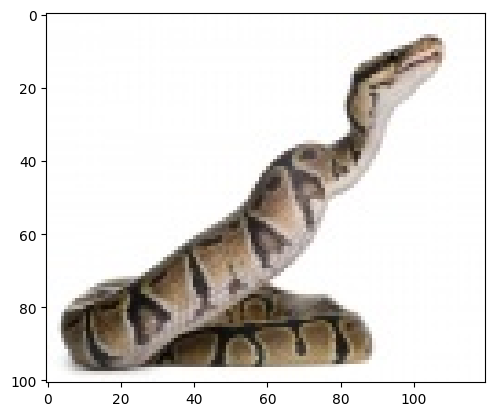

In [12]:
for obraz in obrazy:
  painting = plt.imread(obraz)
  print(painting.shape)
  print(f"Rozmiar obrazu: {painting.shape[0] * painting.shape[1]} pikseli")
  plt.imshow(painting);